In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [84]:
df = pd.read_csv('TrainingDatacopy.csv')

In [85]:
df

,Unnamed: 0,ID,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Turbo,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags
0,0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,NaN,186005,6,Automatic,Front-Rear,4-5,Left wheel,Silver,12
1,1,44731507,16621,1018,CHEVROLET,EQUINOX,2011,Jeep,No,Petrol,3.0,NaN,192000,6,Tiptronic,Front-Rear,4-5,Left wheel,Black,8
2,2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,NaN,200000,4,Variator,Front,4-5,Right-hand drive,Black,2
3,3,45769185,3607,862,FORD,ESCAPE,2011,Jeep,Yes,Hybrid,2.5,NaN,168966,4,Automatic,Front-Rear,4-5,Left wheel,White,0
4,4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,NaN,91901,4,Automatic,Front,4-5,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13448,13462,45802417,21103,1104,HYUNDAI,GRANDEUR,2015,Sedan,Yes,LPG,3.0,NaN,273249,4,Automatic,Front,4-5,Left wheel,Black,4
13449,13463,44631202,13172,530,HYUNDAI,ELANTRA,2013,Sedan,Yes,Petrol,1.6,NaN,75000,4,Tiptronic,Front,4-5,Left wheel,White,8
13450,13464,45669073,19757,353,TOYOTA,PRIUS,2015,Hatchback,No,Hybrid,1.8,NaN,105000,4,Automatic,Front,4-5,Left wheel,Silver,8
13451,13465,45647811,1019,917,BMW,X5,2013,Jeep,Yes,Diesel,3.0,NaN,137802,6,Automatic,Front-Rear,4-5,Left wheel,Black,0


In [86]:
#df_prices = df.groupby("Color").agg([np.mean, np.std])

import warnings
warnings.filterwarnings("ignore") #ignore warnings

Manufacturer = df.groupby("Manufacturer").agg([np.mean, np.std])
Model = df.groupby("Model").agg([np.mean, np.std])
Prod_year = df.groupby("Prod_year").agg([np.mean, np.std])
Category = df.groupby("Category").agg([np.mean, np.std])
Leather_interior = df.groupby("Leather_interior").agg([np.mean, np.std])

Fuel_type = df.groupby("Fuel_type").agg([np.mean, np.std])
Engine_volume = df.groupby("Engine_volume").agg([np.mean, np.std])
Turbo = df.groupby("Turbo").agg([np.mean, np.std])
Mileage = df.groupby("Mileage").agg([np.mean, np.std])
Cylinders = df.groupby("Cylinders").agg([np.mean, np.std])

Gear_box_type = df.groupby("Gear_box_type").agg([np.mean, np.std])
Drive_wheels = df.groupby("Drive_wheels").agg([np.mean, np.std])
Doors = df.groupby("Doors").agg([np.mean, np.std])
Wheel = df.groupby("Wheel").agg([np.mean, np.std])
Color = df.groupby("Color").agg([np.mean, np.std])
Airbags = df.groupby("Airbags").agg([np.mean, np.std])

Manufacturer.head()


Unnamed: 0                         ID                \
                      mean          std          mean           std   
Manufacturer                                                          
ACURA          4564.000000  3268.083842  4.574356e+07  6.440942e+04   
ALFA ROMEO     7122.666667  5994.084528  4.413522e+07  2.038803e+06   
ASTON MARTIN  13325.000000          NaN  4.343235e+07           NaN   
AUDI           6761.299401  3915.354419  4.550577e+07  1.446298e+06   
BENTLEY        3502.500000  1724.633439  4.580029e+07  1.906996e+04   

                      Price                       Levy               \
                       mean           std         mean          std   
Manufacturer                                                          
ACURA           7148.818182  11325.108466  1120.181818   217.452440   
ALFA ROMEO     11687.000000   7594.850821     0.000000     0.000000   
ASTON MARTIN   54000.000000           NaN     0.000000          NaN   
AUDI           14677.694611  18101.019038   592.347305   501.062160   
BENTLEY       197574.500000  31045.523228  1409.500000  1993.334016   

                Prod_year           Engine_volume                  Mileage  \
                     mean       std          mean       std           mean   
Manufacturer                                                                 
ACURA         2012.272727  2.148996      3.154545  0.603927  115578.909091   
ALFA ROMEO    2006.333333  6.110101      1.800000  0.400000  159066.666667   
ASTON MARTIN  2007.000000       NaN      4.300000       NaN   72000.000000   
AUDI          2011.257485  4.986686      2.557485  0.622220  159040.874251   
BENTLEY       2014.000000  2.828427      5.400000  1.979899   30844.500000   

                            Cylinders              Airbags            
                        std      mean       std       mean       std  
Manufacturer                                                          
ACURA          83051.903917  5.272727  1.009050  11.818182  0.603023  
ALFA ROMEO     77727.815699  4.000000  0.000000   8.666667  4.163332  
ASTON MARTIN            NaN  8.000000       NaN   8.000000       NaN  
AUDI          105756.328017  5.125749  1.423468   5.107784  5.049192  
BENTLEY        34868.142487  8.000000  0.000000   6.000000  8.485281

In [90]:
manufacturer = Manufacturer['Price']
# model = Model['Price']
prod_year = Prod_year['Price']
category = Category['Price']
leather_interior = Leather_interior['Price']

fuel_type = Fuel_type['Price']
engine_volume = Engine_volume['Price']
#turbo = Turbo['Price']
# mileage = Mileage['Price']
cylinders = Cylinders['Price']

gear_box_type = Gear_box_type['Price']
drive_wheels = Drive_wheels['Price']
doors = Doors['Price']
wheel = Wheel['Price']
color = Color['Price']
airbags = Airbags['Price']

print(manufacturer)

               mean           std
Turbo                            
Turbo  28107.325876  29011.483365


<AxesSubplot:title={'center':'Mean Prices'}, ylabel='Airbags'>

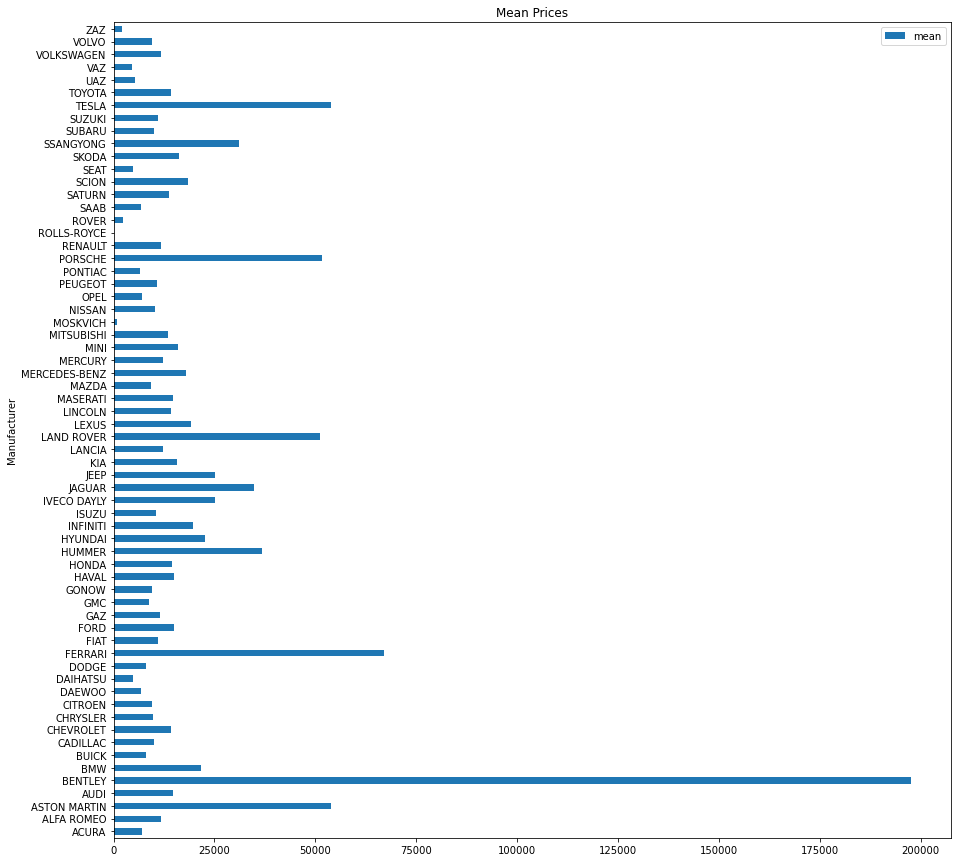

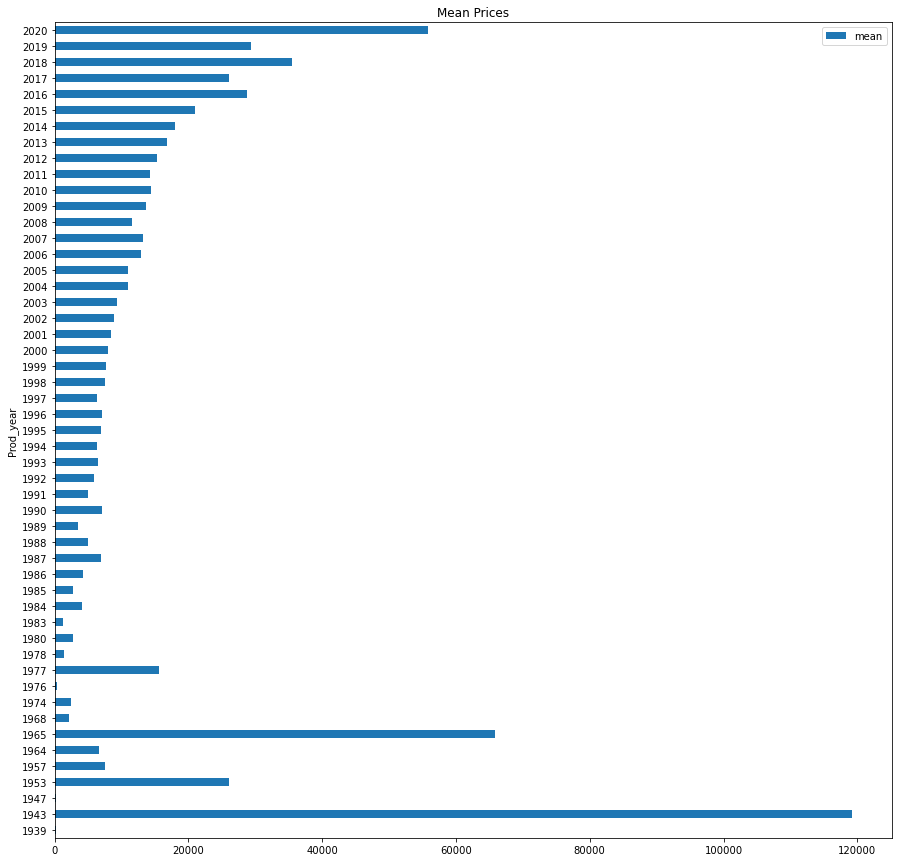

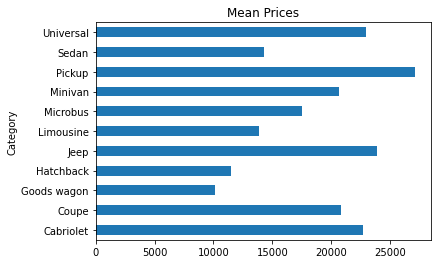

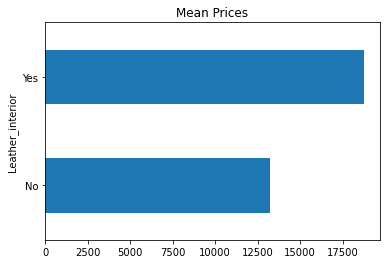

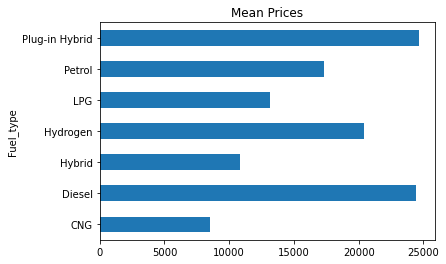

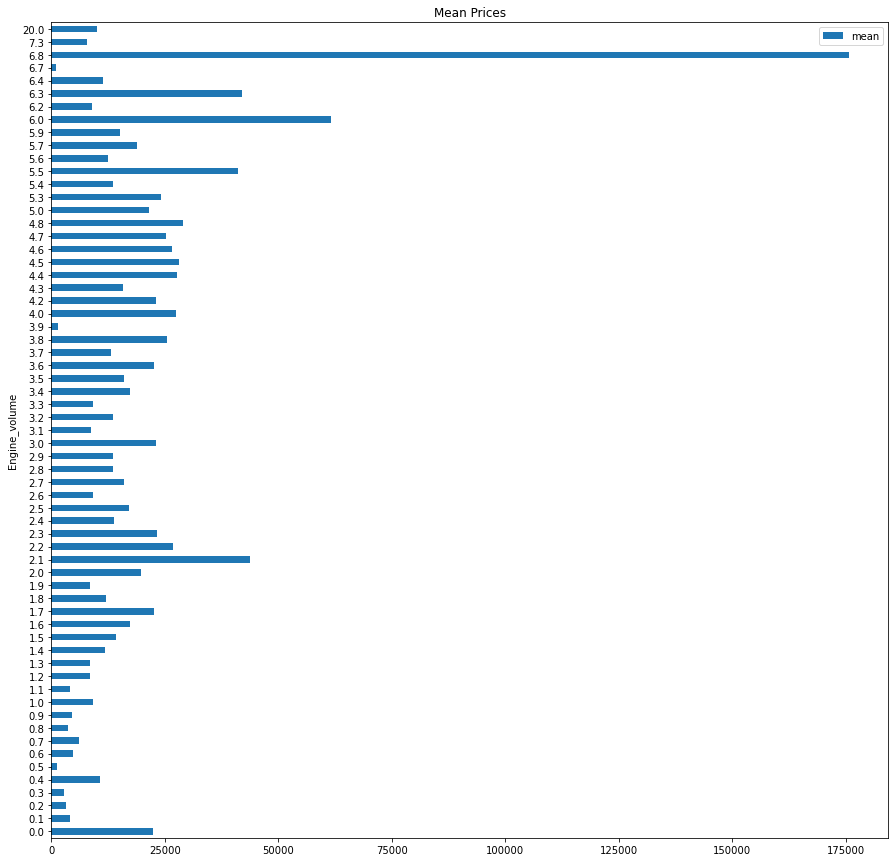

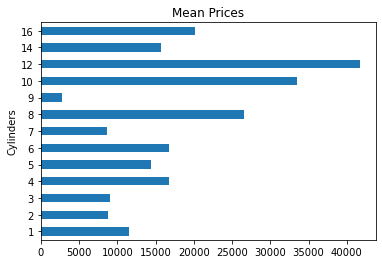

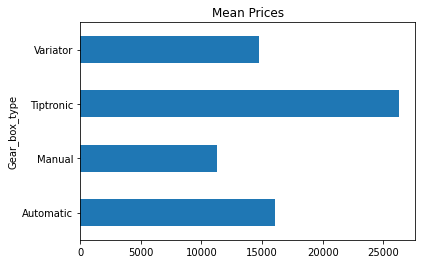

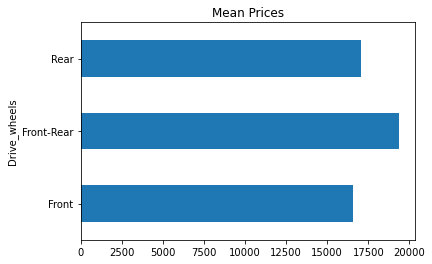

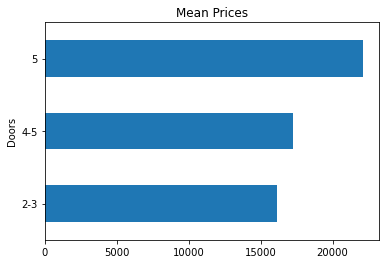

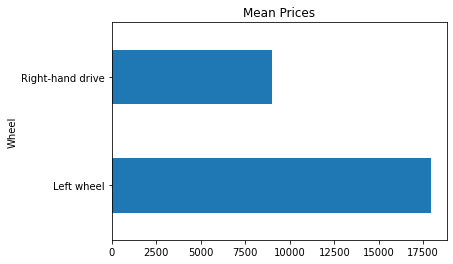

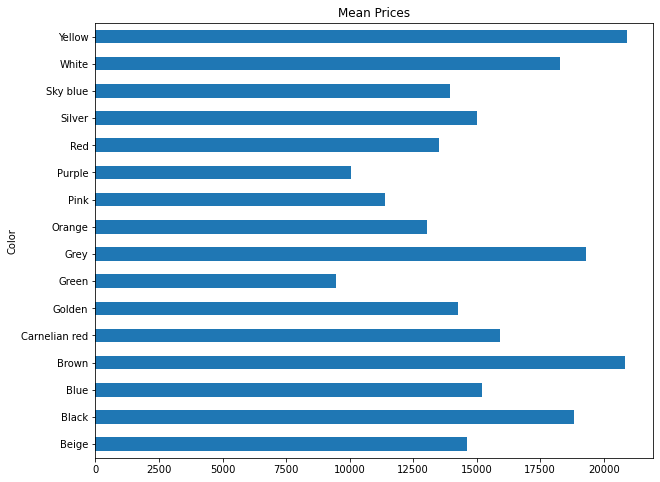

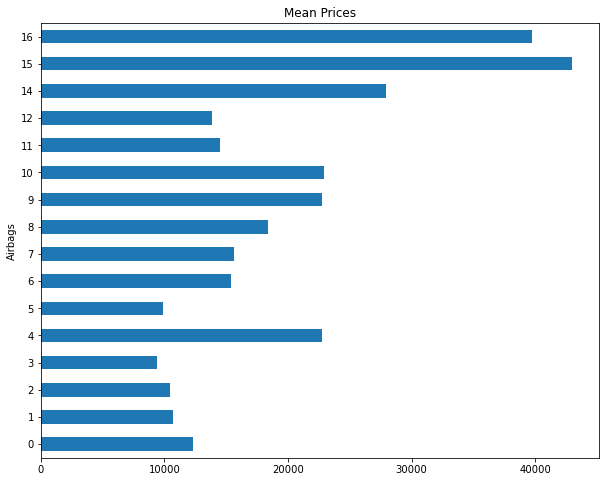

In [91]:
manufacturer.plot(kind = "barh", y = "mean", legend = True, title = "Mean Prices", figsize = (15,15))
# model.plot(kind = "barh", y = "mean", legend = False,title = "Mean Prices")  >>>>>>>>>>
prod_year.plot(kind = "barh", y = "mean", legend = True,title = "Mean Prices", figsize = (15,15))
category.plot(kind = "barh", y = "mean", legend = False,title = "Mean Prices")
leather_interior.plot(kind = "barh", y = "mean", legend = False,title = "Mean Prices")

fuel_type.plot(kind = "barh", y = "mean", legend = False,title = "Mean Prices")
engine_volume.plot(kind = "barh", y = "mean", legend = True,title = "Mean Prices", figsize = (15,15))
#turbo.plot(kind = "barh", y = "mean", legend = False,title = "Mean Prices")
# mileage.plot(kind = "barh", y = "mean", legend = False,title = "Mean Prices")  >>>>>>>>>>
cylinders.plot(kind = "barh", y = "mean", legend = False,title = "Mean Prices")

gear_box_type.plot(kind = "barh", y = "mean", legend = False,title = "Mean Prices")
drive_wheels.plot(kind = "barh", y = "mean", legend = False,title = "Mean Prices")
doors.plot(kind = "barh", y = "mean", legend = False,title = "Mean Prices")
wheel.plot(kind = "barh", y = "mean", legend = False,title = "Mean Prices")
color.plot(kind = "barh", y = "mean", legend = False,title = "Mean Prices", figsize = (10,8))
airbags.plot(kind = "barh", y = "mean", legend = False,title = "Mean Prices", figsize = (10,8))

In [ ]:
print(df.Color.unique())

In [ ]:
data = df.Color
pd.get_dummies(data)

In [ ]:
pd.get_dummies(df, columns=["Color"])

In [ ]:
data = df.Drive_wheels
pd.get_dummies(data)

In [ ]:
pd.get_dummies(df, columns=["Drive_wheels"])